In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
path_data = os.path.join("Data", "daily_all.csv")
df = pd.read_csv(path_data, index_col=0)

In [84]:
df = df.drop(columns=["date", "week_start"])

In [85]:
df.head()

,workday,profession,work_mode,chronotype,age,sex,height_cm,mental_health_history,exercise_habit,caffeine_sensitivity,...,workouts_count,cheat_meals_count,has_intervention,intervention_diet_coaching,intervention_exercise_plan,intervention_meditation,intervention_sick_leave,intervention_therapy,intervention_vacation,intervention_workload_cap
user_id,,,,,,,,,,,,,,,,,,,,,
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False


In [86]:
col_pred = [
    "has_intervention",
    "intervention_diet_coaching",
    "intervention_exercise_plan",
    "intervention_meditation",
    "intervention_sick_leave",
    "intervention_therapy",
    "intervention_vacation",
    "intervention_workload_cap"
]

In [87]:
df.columns

Index(['workday', 'profession', 'work_mode', 'chronotype', 'age', 'sex',
       'height_cm', 'mental_health_history', 'exercise_habit',
       'caffeine_sensitivity', 'baseline_bmi', 'sleep_hours', 'sleep_quality',
       'work_hours', 'meetings_count', 'tasks_completed', 'emails_received',
       'commute_minutes', 'exercise_minutes', 'steps_count', 'caffeine_mg',
       'alcohol_units', 'screen_time_hours', 'social_interactions',
       'outdoor_time_minutes', 'diet_quality', 'calories_intake',
       'stress_level', 'mood_score', 'energy_level', 'focus_score',
       'work_pressure', 'weather_mood_impact', 'weight_kg', 'job_satisfaction',
       'perceived_stress_scale', 'anxiety_score', 'depression_score',
       'sleep_debt_hours', 'avg_weight_kg_week', 'workouts_count',
       'cheat_meals_count', 'has_intervention', 'intervention_diet_coaching',
       'intervention_exercise_plan', 'intervention_meditation',
       'intervention_sick_leave', 'intervention_therapy',
       'inter

# Biais

In [88]:
cols_constant = [
    "age", "sex", "height_cm", "profession", "work_mode", "chronotype", 
    "mental_health_history", "exercise_habit", "caffeine_sensitivity", "baseline_bmi"
]

df_unique_user = df.groupby("user_id").first()

df_unique_user = df_unique_user[cols_constant]

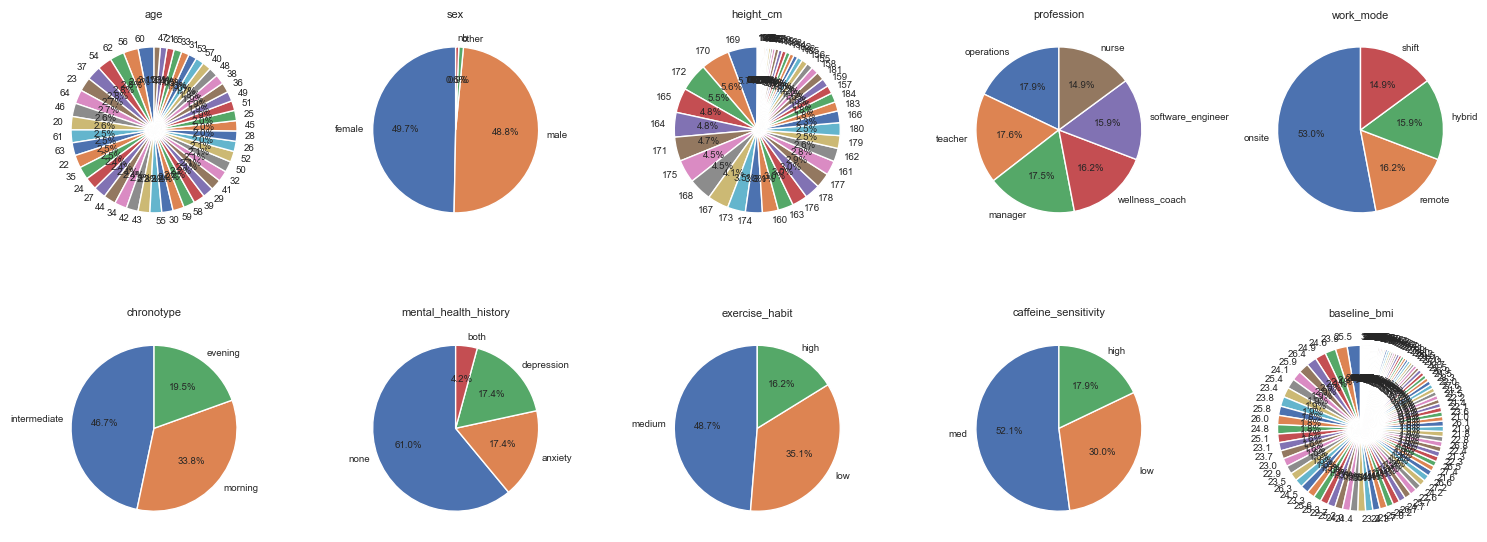

In [89]:
cols_per_row = 5

n_cols = len(df.columns)
n_rows = (n_cols // cols_per_row) + 1

plt.figure(figsize=(cols_per_row * 3, n_rows * 3))  

for i, col in enumerate(cols_constant):
    plt.subplot(n_rows, cols_per_row, i + 1)
    df_unique_user[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 7}
    )
    plt.title(col, fontsize=8)
    plt.ylabel('')

plt.tight_layout()
plt.show()

Les graphiques ci-dessus présentent la distribution des principales caractéristiques des utilisateurs (sexe, âge, chronotype, mode de travail, etc.).
On observe des répartitions globalement équilibrées, sans surreprésentation extrême d’un groupe particulier.
Ces résultats indiquent que le dataset de base ne présente pas de biais structurel évident.

In [90]:
# --- Catégorisation de l'âge ---
bins_age = [20, 35, 50, 65]
labels_age = ['Jeune (20-35)', 'Adulte (35-50)', 'Senior (50-65)']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, include_lowest=True)

# --- Catégorisation de la taille ---
bins_height = [140, 160, 180, 200]
labels_height = ['Petit (140-160)', 'Moyen (160-180)', 'Grand (180-200)']
df['height_group'] = pd.cut(df['height_cm'], bins=bins_height, labels=labels_height, include_lowest=True)

# --- Catégorisation du BMI ---
bins_bmi = [18, 23, 28, 32]
labels_bmi = ['Normal (18-23)', 'Élevé (23-28)', 'Haut (28-32)']
df['bmi_group'] = pd.cut(df['baseline_bmi'], bins=bins_bmi, labels=labels_bmi, include_lowest=True)


In [91]:
cols_group = [
    "age_group",
    "height_group",
    "bmi_group",
    "sex",
    "profession",
    "work_mode",
    "chronotype",
    "mental_health_history",
    "exercise_habit",
    "caffeine_sensitivity"
]

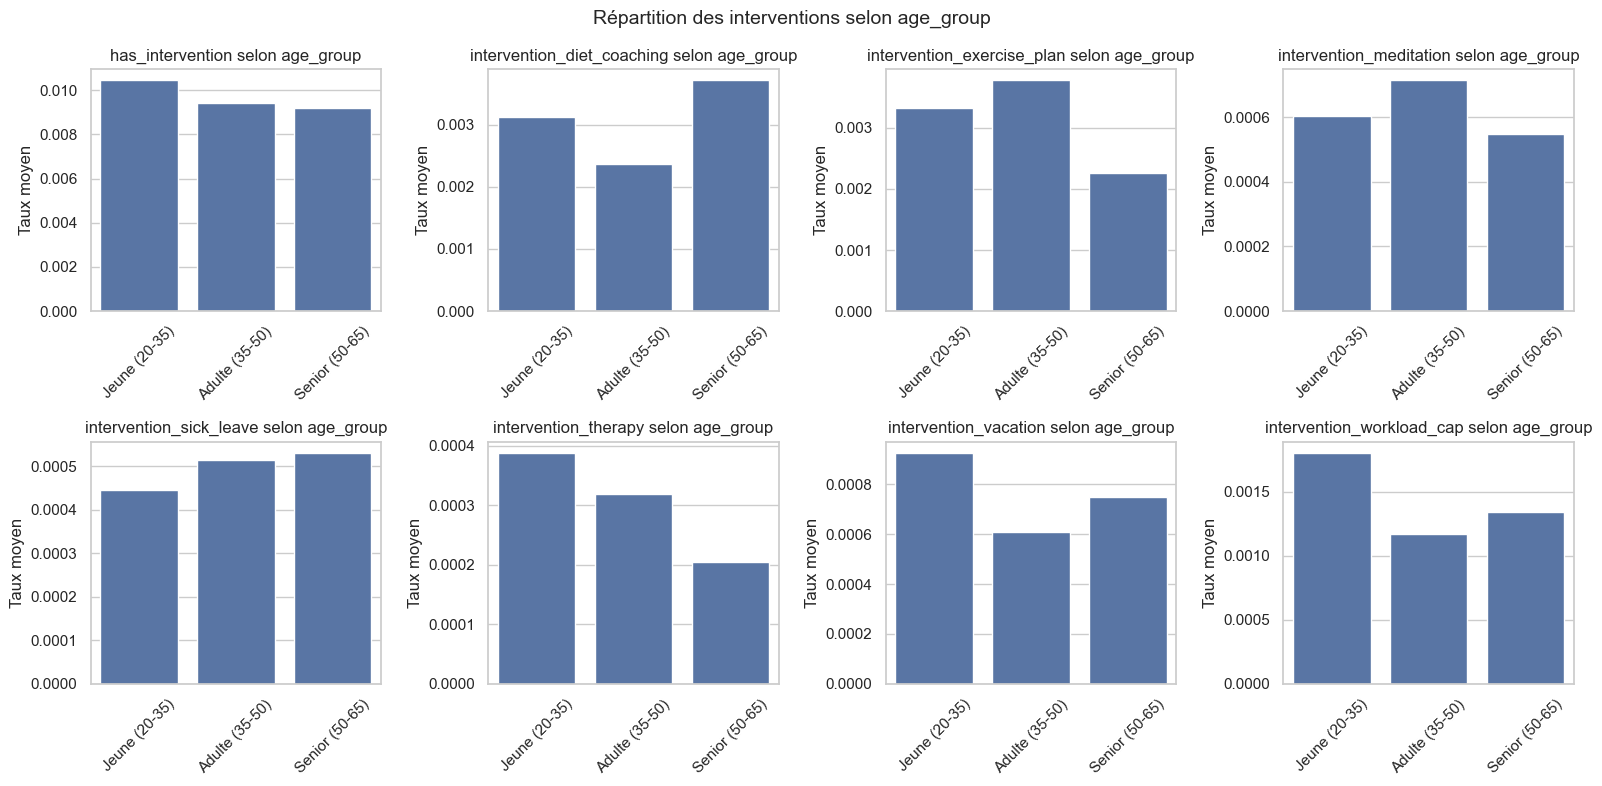

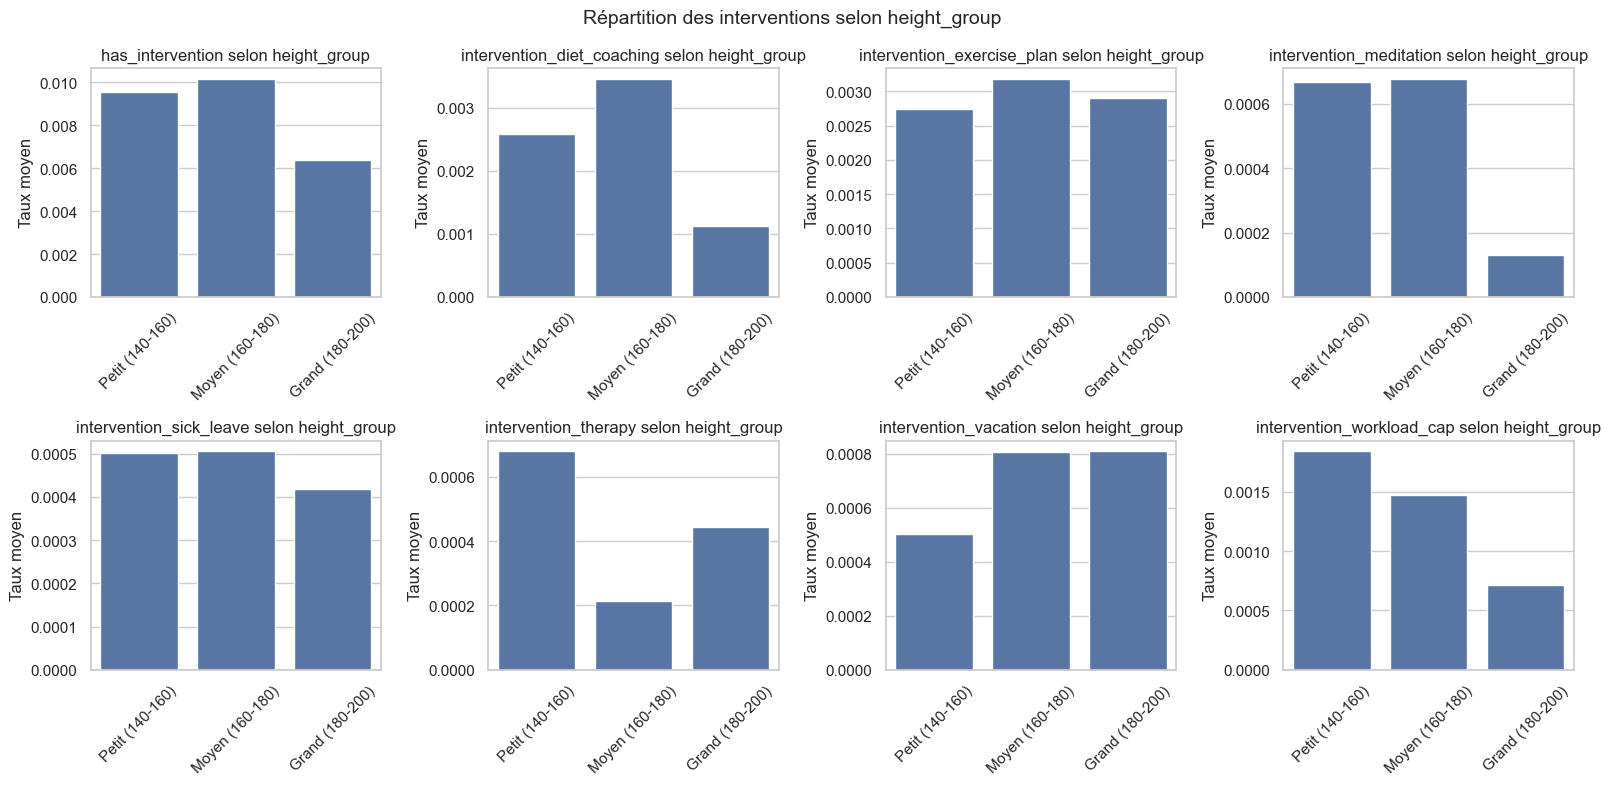

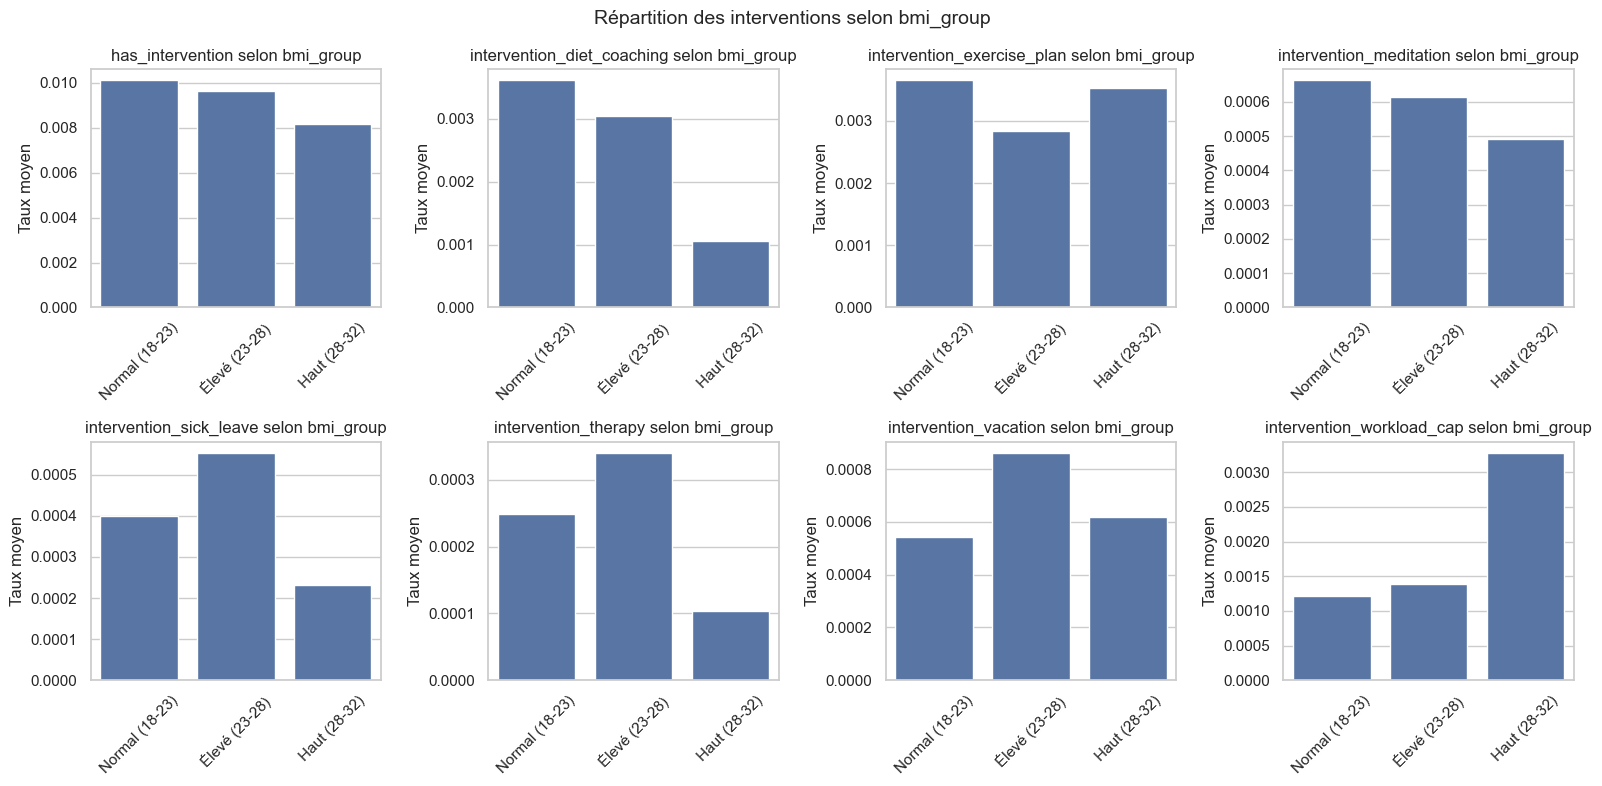

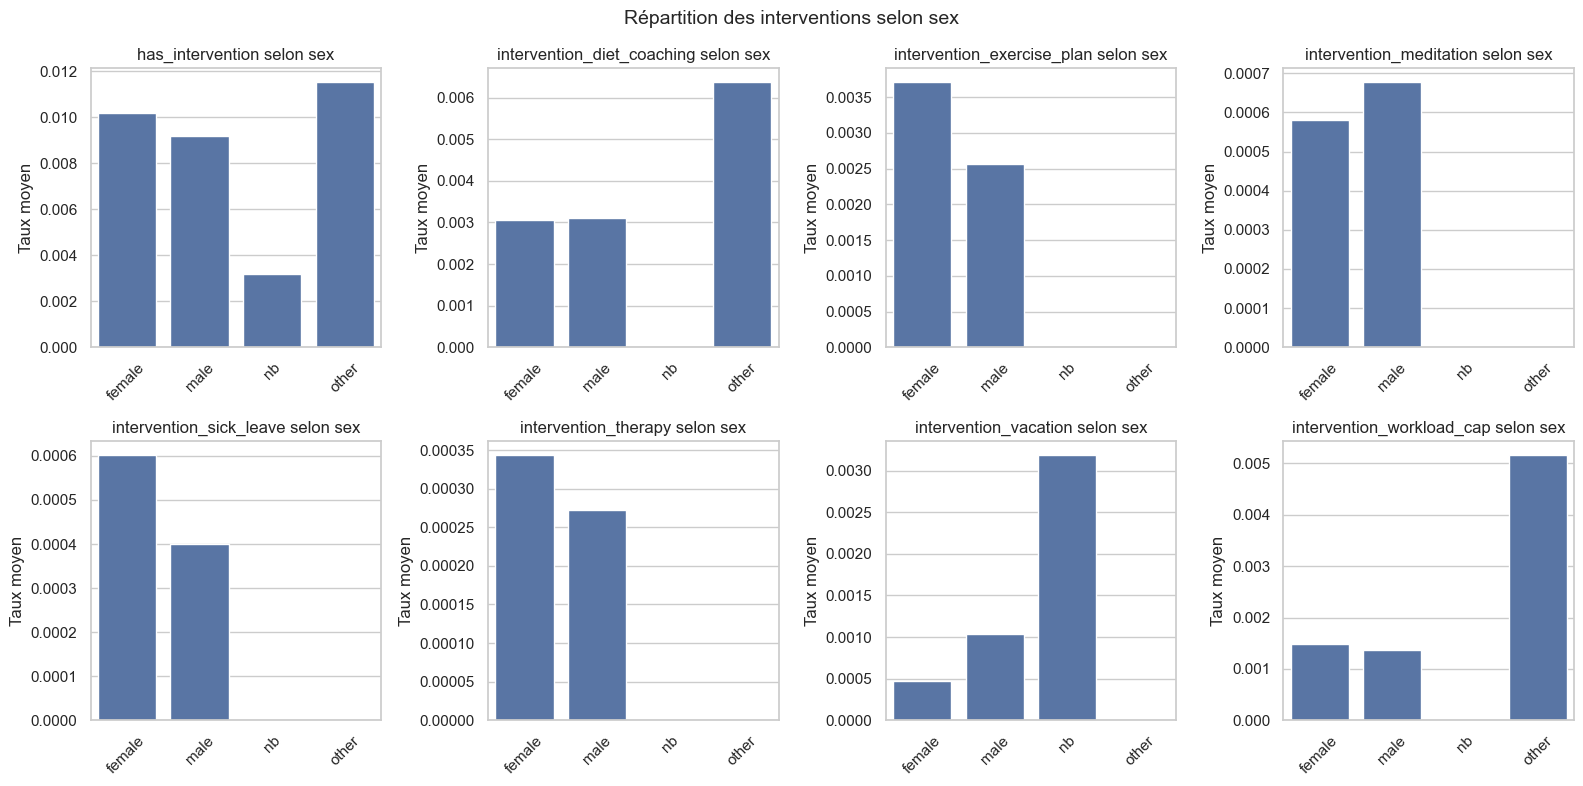

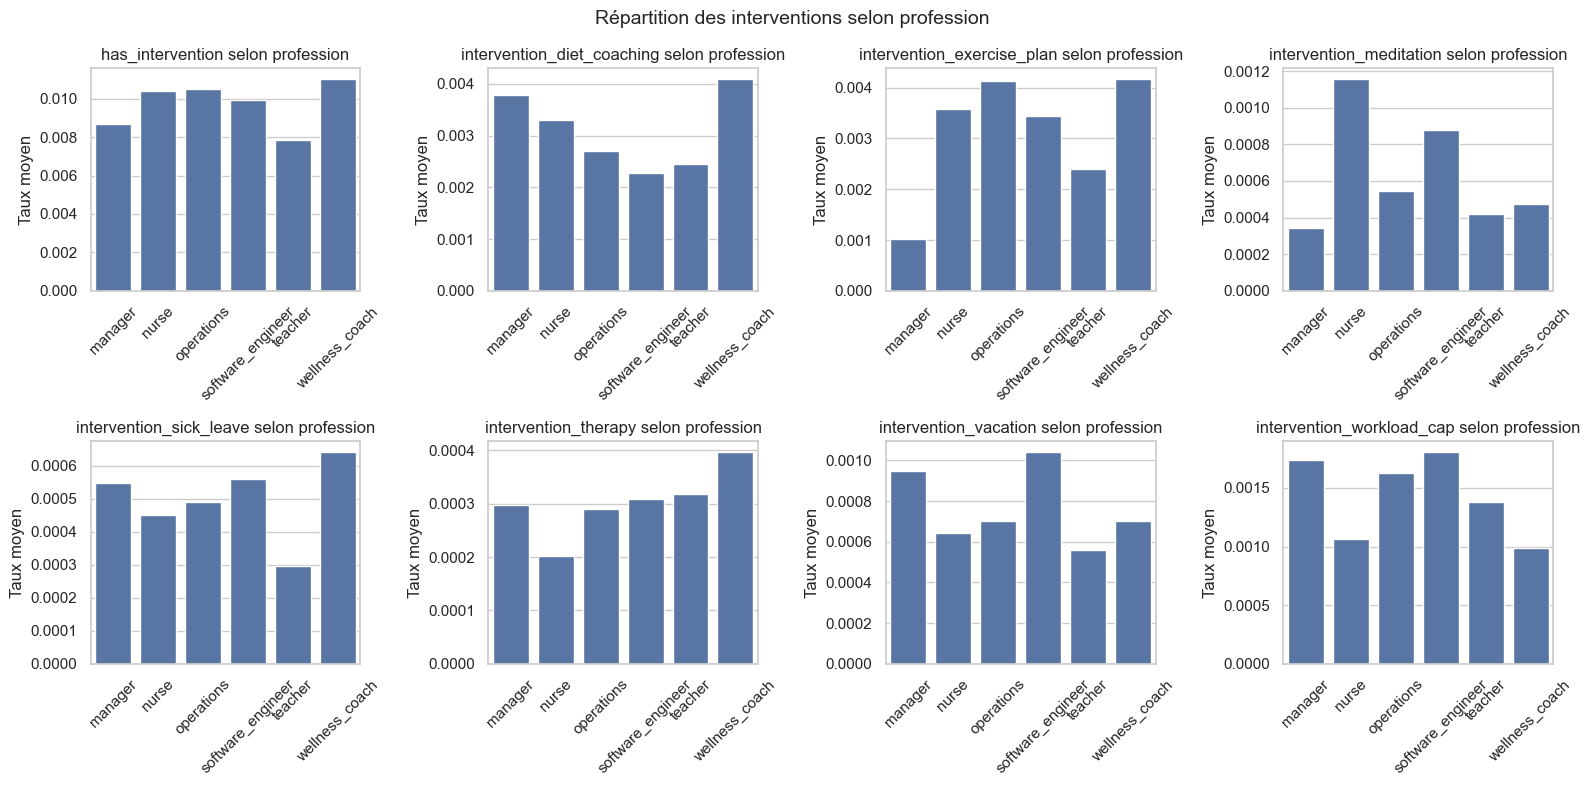

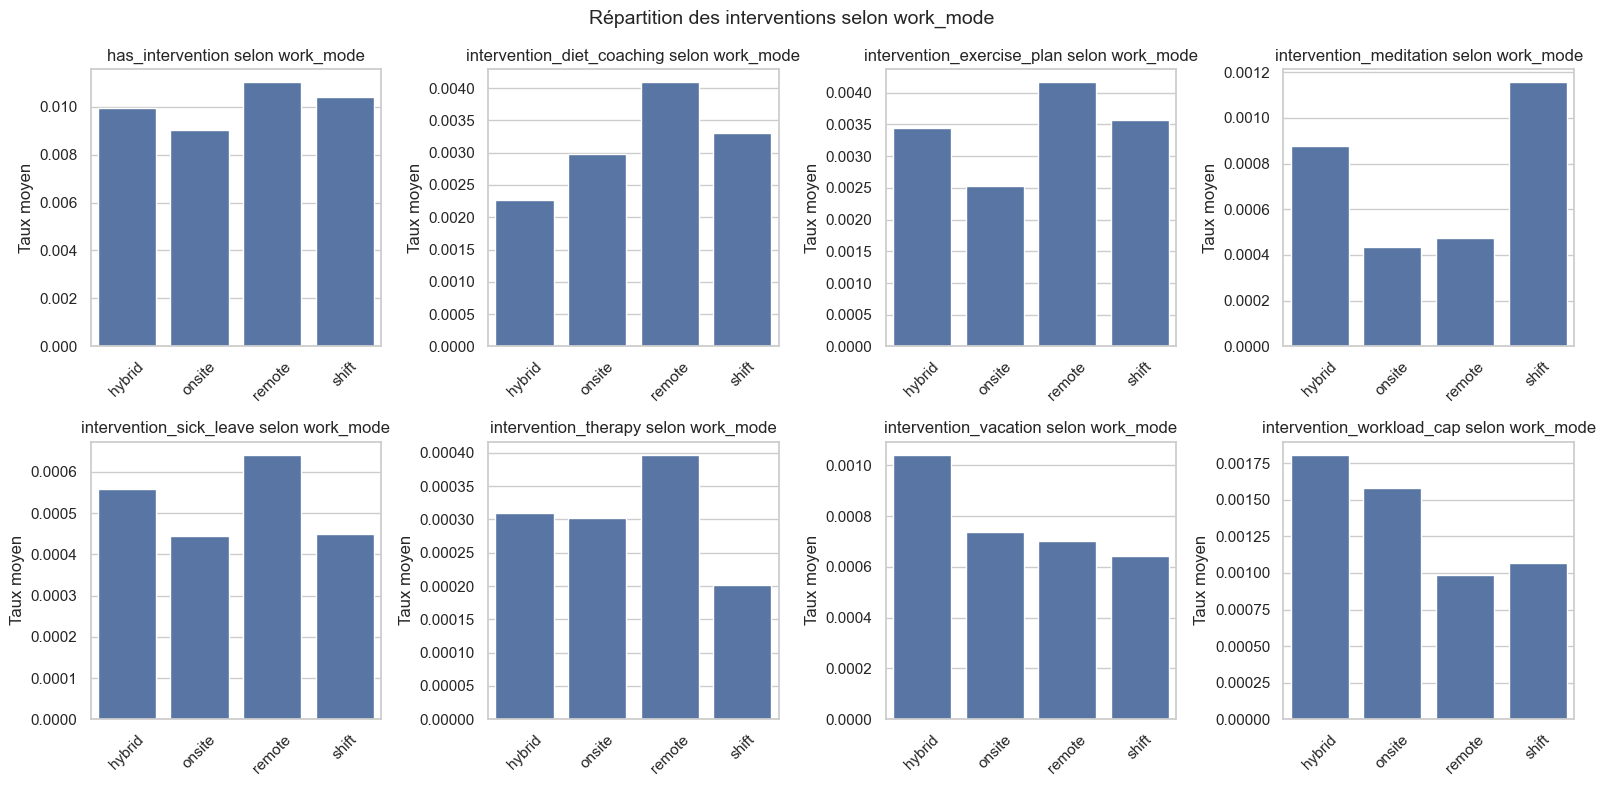

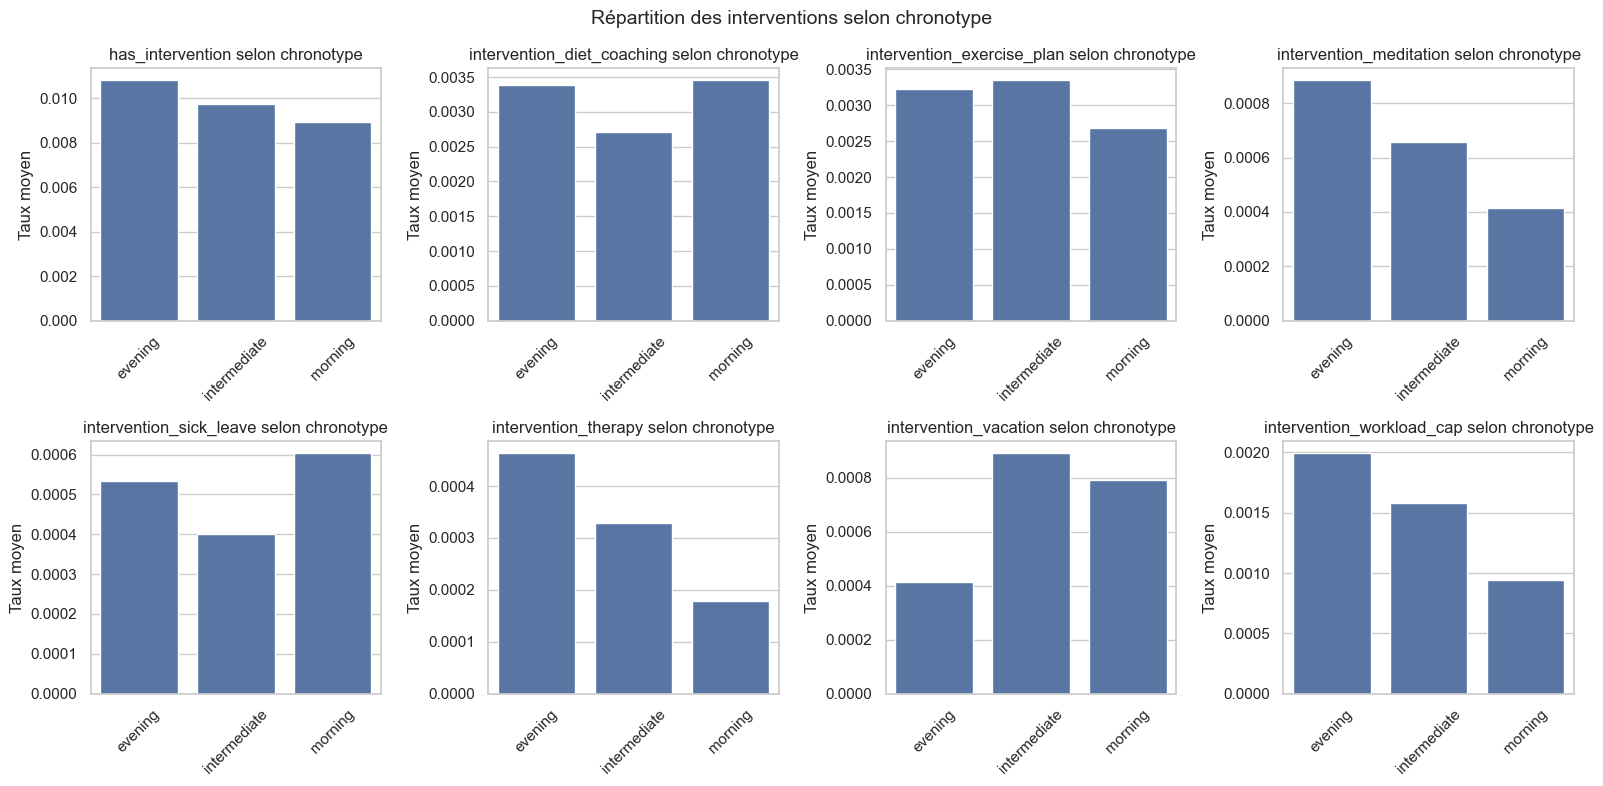

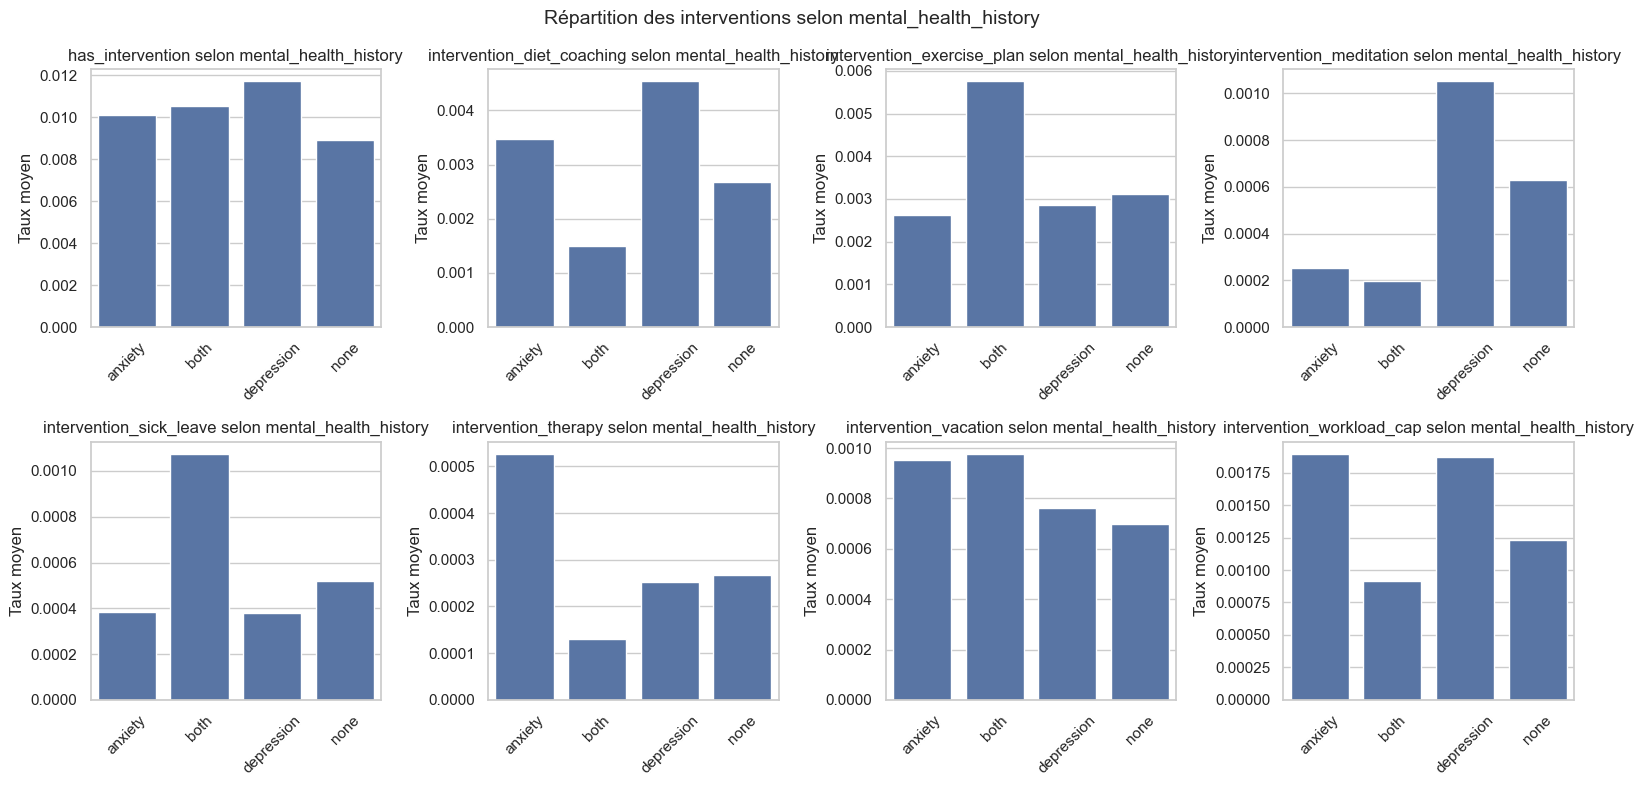

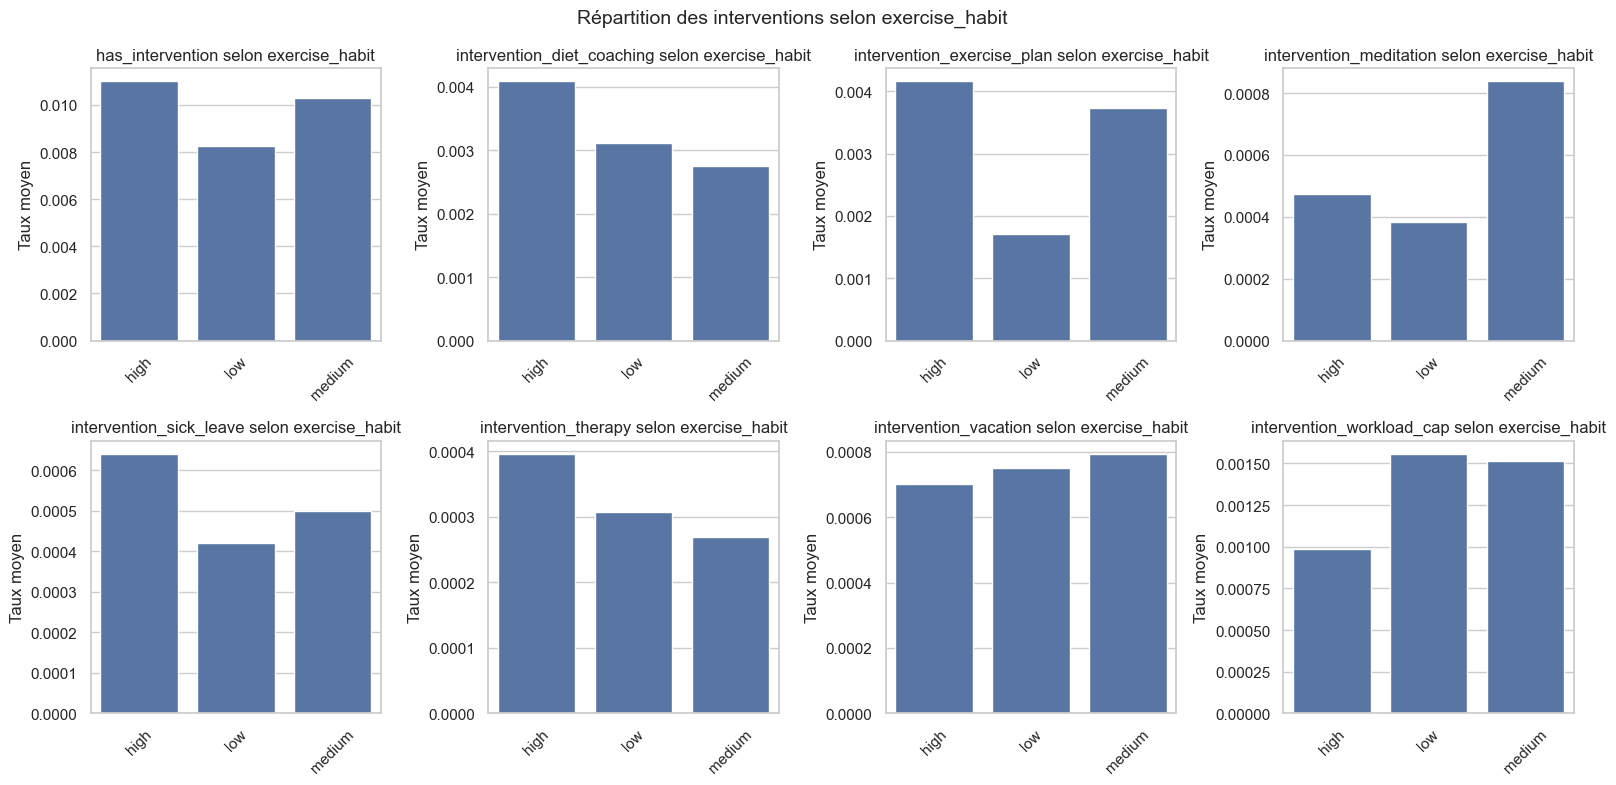

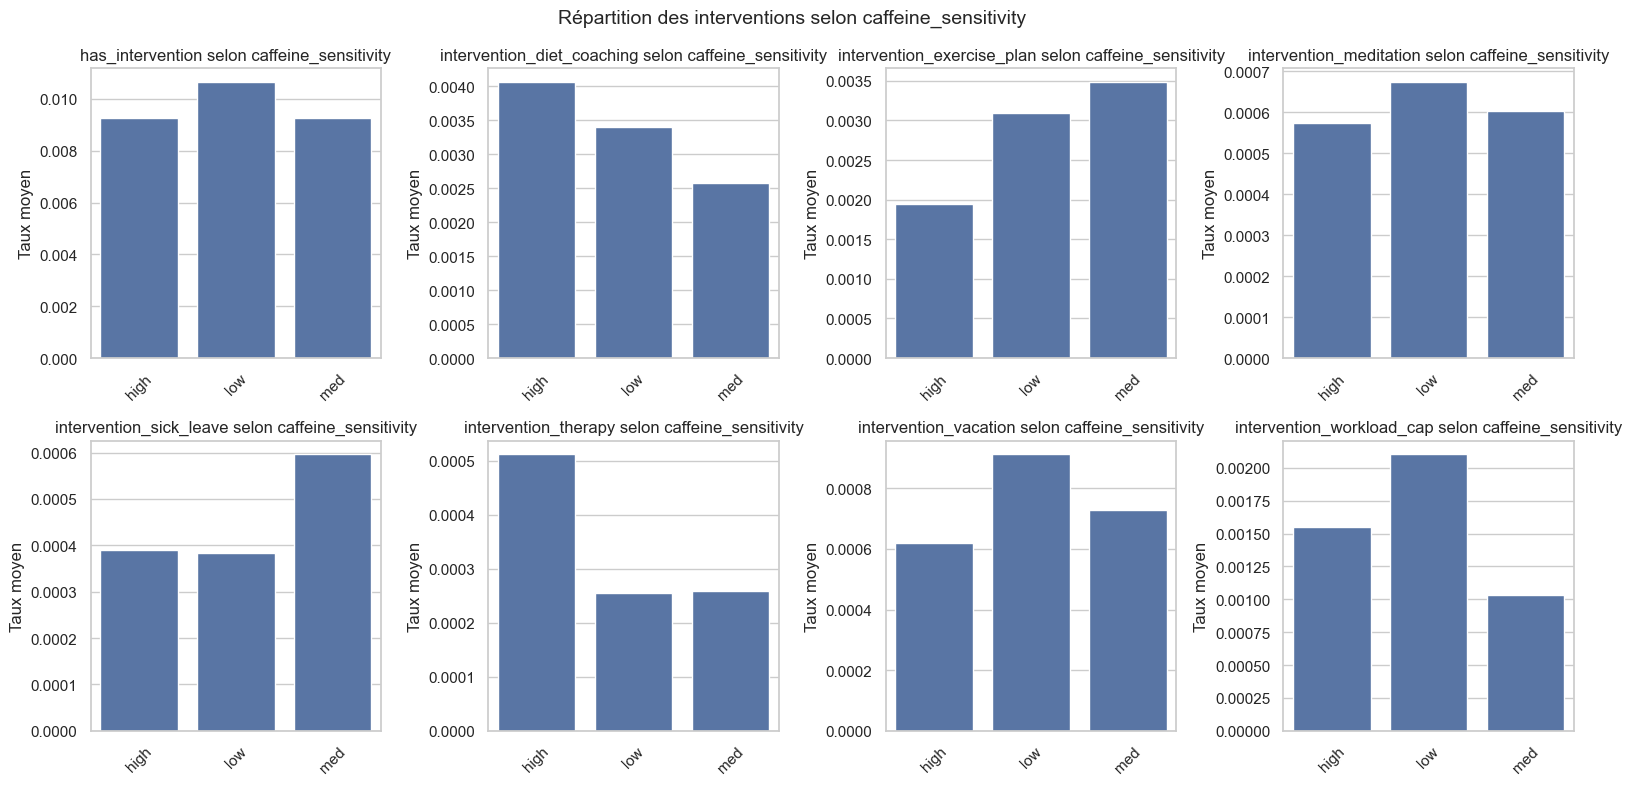

In [92]:
sns.set(style="whitegrid")

for group_col in cols_group:
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    
    for i, target in enumerate(col_pred):
        if i >= len(axes):
            break
        # Calcul du taux moyen d'intervention pour chaque catégorie
        data_plot = df.groupby(group_col, observed=True)[target].mean().reset_index()
        sns.barplot(data=data_plot, x=group_col, y=target, ax=axes[i])
        axes[i].set_title(f"{target} selon {group_col}")
        axes[i].set_ylabel("Taux moyen")
        axes[i].set_xlabel("")
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.suptitle(f"Répartition des interventions selon {group_col}", fontsize=14)
    plt.tight_layout()
    plt.show()
